# 4 確率と統計の基礎

- **[4.1 確率・統計の基礎](#4.1-確率・統計の基礎)** 
    - [4.1.1 確率](#4.1.1-確率)
    - [4.1.2 確率変数と確率分布](#4.1.2-確率変数と確率分布)
    - [4.1.3 （応用）多次元確率分布](#4.1.3-（応用）多次元確率分布)
    - [4.1.4 標本分布](#4.1.4-標本分布)
    - [4.1.5 統計的推定](#4.1.5-統計的推定)
    - [4.1.6 統計的検定](#4.1.6-統計的検定)
<br><br>
- **[4.2 総合問題](#4.2-総合問題)**
    - [4.2.1 推定と検定の問題](#4.2.1-推定と検定の問題)

***

## 4.1 確率・統計の基礎

ゴール：確率と統計の基礎的な理解と計算ができる

In [1]:
# 以下のモジュールを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３まで表示
%precision 3

'%.3f'

### 4.1.1 確率
キーワード：確率、試行、根元事象、標本空間、事象、条件付き確率、ベイズの定理、事前確率、事後確率

ここからは確率の概念等について学び、少し理論的なお話に入ります。数式が若干多くなり、はじめは少しとっつきにくいですが、徐々に慣れていきましょう。以前紹介した参考文献や以下のURLなどが初心者向けになりますので、これらをあわせて使うと確率・統計の基礎についてより理解ができると思います。これらの基礎知識を見たことはあるというレベルを前提に、解説を進めていきます。

>[参考文献]  
>『統計学入門』(東京大学教養学部統計学教室 (編集)、東京大学出版)  
>『統計学』(久保川 達也 (著), 国友 直人 (著)、東京大学出版)  
>『統計学』(森棟 公夫 (著), 照井 伸彦 (著), 中川 満 (著), 西埜 晴久 (著), 黒住 英司 (著)、有斐閣)  

>[参考URL]  
>(統計学の時間)  https://bellcurve.jp/statistics/course/#step1

まず、サイコロを例に、確率を学ぶ上で必要となる用語や概念について説明していきます。サイコロが取りうる状態は、1から6の数字であり、以下のような実装を考えます。

In [2]:
# サイコロと見なしたデータ
# 注意：配列は順番が考慮されているので、厳密には集合ではないが、集合とみなす
dice_data = np.array([1, 2, 3, 4, 5, 6])

次の処理は、上のデータから1つだけランダムに抽出しており、これを**試行**といいます。サイコロを1回ふることと同じと思ってもらえばよいです。

In [3]:
from numpy import random
random.seed(0)

# 引数は、対象データdice_dataから1つランダムに抽出するという意味
print("1つだけランダムに抽出:", random.choice(dice_data, 1))

1つだけランダムに抽出: [5]


上記の結果は、「5」が抽出されており、他にも「1」や「3」などもあり、この試行結果を**根元事象（基本事象）**といいます。また、すべての可能な根元事象を集めた集合を**標本空間(以下Sで表します)**、標本空間の任意の部分集合を**事象**といいます。例えば、先ほどの5が出る事象Xや、以下のような偶数の事象Eなどが考えられます。

\begin{eqnarray}
S=\{1, 2, 3, 4, 5, 6\}
\end{eqnarray}

\begin{eqnarray}
X=\{5\}
\end{eqnarray}

\begin{eqnarray}
E=\{2, 4, 6\}
\end{eqnarray}

他、空集合Φも事象としてあり、**空事象**といい、決して起こりえない事象です。例えば、7の目が出ることは普通のサイコロではないので、確率は0となります。ここで、「確率」という言葉を使いましたが、その公理は以下となります。

>ある事象Eが起こる確率をP(E)と記せば、次の公理を満たさなければならない。
>
>P1：  任意の事象Eについて、0≦P(E)≦1
>
>P2：  P(S)=1 (補足：これは全事象の確率が1であることを意味します。)
>
>P3：  A∩B=Φ ならば、P(A∪B) = P(A) + P(B)

なお、Eに属さない結果の集合を**余事象**といいます。これは、Eの**補集合**に対応し、以下のようにcを使って（complement）表します。

\begin{eqnarray}
E^c=\{1, 3, 5\}
\end{eqnarray}

A∩Bは、積事象といい、2つの事象に共通な事象のことを指します。具体的には、

\begin{eqnarray}
A=\{1, 2, 3\}
\end{eqnarray}

\begin{eqnarray}
B=\{1, 3, 4, 5\}
\end{eqnarray}

の2つの集合を考えた場合、共通している数字は1と3なので、

\begin{eqnarray}
A \cap B=\{1, 3\}
\end{eqnarray}

となります。

A∪Bは、和事象といい、2つの事象の和のことを指します。上と同じAとBで考えると、以下となります。

\begin{eqnarray}
A \cup B=\{1, 2, 3, 4, 5\}
\end{eqnarray}

これらの事象が起こる確率を計算すると、

\begin{eqnarray}
P(X)=\frac{1}{6}
\end{eqnarray}

\begin{eqnarray}
P(\phi)= 0
\end{eqnarray}

\begin{eqnarray}
P(A \cap B)=\frac{1}{3}
\end{eqnarray}

\begin{eqnarray}
P(A \cup B)=\frac{5}{6}
\end{eqnarray}

になります。ここで計算したアプローチを数学的確率ということもあります。

厳密には、集合・位相論やルベーグ積分論等から入るのですが、ここでは割愛します。時間に余裕がある人やこれらの研究者の道に進む方は、以下のような参考文献があります。特に上から2つ目の測度と積分は、数学科出身の人以外にもわかるように、しかも厳密に書いていますので、測度論をちゃんと勉強されたい方にオススメです。

>[参考文献]  
>『測度・確率・ルベーグ積分 応用への最短コース』(原 啓介 (著)、講談社)  
>『測度と積分―入門から確率論へ』(M.ツァピンスキ (著),E.コップ  (著),二宮 祥一 (翻訳),原 啓介 (翻訳)、培風館)  
>『確率論 (新しい解析学の流れ)』(熊谷 隆 (著)、共立出版)  

次は実験的にサイコロを1000回ふるシミュレーションを実施してみます。それぞれの根元事象（1〜6）が実際に確率1/6で起きるのか、計算してみましょう。

In [4]:
# サイコロを1000回振ってみる
calc_steps = 1000

# seedの固定
random.seed(0)

# 1〜6のデータの中から、1000回の抽出を実施
count_all_dice = random.choice(dice_data, calc_steps)

In [17]:
# 計算結果を入れるための空箱
prob_data = np.array([])

# それぞれの数字がどれくらいの割合で抽出されたか計算
for i in range(1, 7):
    print(i, "が出る確率", len(count_all_dice[count_all_dice==i]) / calc_steps)
    prob_data = np.append(prob_data, len(count_all_dice[count_all_dice==i]) / calc_steps)

1 が出る確率 0.171
2 が出る確率 0.157
3 が出る確率 0.157
4 が出る確率 0.183
5 が出る確率 0.161
6 が出る確率 0.171


ほぼ1/6に近いのがわかります。これは**統計的確率**と言われます。この現象については後で詳しく学びます。

次に、条件付き確率と独立性について学びましょう。事象Aが生じた条件のもとで事象Bが生じる確率を、Aが与えられたもとでのBの条件付き確率といい、

\begin{eqnarray}
P(B|A) = \frac{P(A \cap B) }{P(A)} 
\end{eqnarray}

と表します（$P(A) >0$）。さらに以下のように式変形ができ、これを**乗法定理**といいます。

\begin{eqnarray}
P(A \cap B) = P(B|A)P(A)
\end{eqnarray}

条件付き確率は、背景情報に基づいた確率と考えることができます。具体的には、サイコロを1回振って、なんの数字だったかわからなかった(忘れた)としましょう。ただ、偶数だということがわかった場合に、その数字が4以上である確率を求めます。偶数であるという条件、ここでは

\begin{eqnarray}
A=\{2, 4, 6\}
\end{eqnarray}

と考え、数字が4以上である事象は、

\begin{eqnarray}
B=\{4, 5, 6\}
\end{eqnarray}

で、さらに

\begin{eqnarray}
A \cap B=\{4, 6\}
\end{eqnarray}

であるため、上の条件付き確率の定義から、求める確率は以下となります。

\begin{eqnarray}
P(B|A) = \frac{P(A \cap B) }{P(A)}
       = \frac{\frac{2}{6}}{\frac{3}{6}}
       = \frac{2}{3}
\end{eqnarray}

次は、独立性の条件です。事象Aと事象Bがお互い独立であるとは、条件つき確率と確率が同じになり、

\begin{eqnarray}
P(A|B) = P(A)
\end{eqnarray}

になることをいいます。Bの事象がAに影響を及ぼしていないと考えることもできます。ここで、上の条件付き確率から以下が成立します。

\begin{eqnarray}
P(A \cap B) = P(A)P(B)
\end{eqnarray}

この式が成立しない場合は、事象AとBとはお互いに従属するといい、先ほどの例で考えると、

\begin{eqnarray}
P(A \cap B)= \frac{2}{6}= \frac{1}{3}
\end{eqnarray}

\begin{eqnarray}
P(A)P(B)= \frac{3}{6}\times\frac{3}{6}=\frac{1}{4}
\end{eqnarray}

で、等しくないため、独立ではなく、従属関係にあることがわかります。

最後に、ベイズの定理について紹介します。先ほど条件付き確率を考えましたが、ここで、$A$を結果の事象、$B$を原因1の事象、$B^c$を原因2の事象とする時、以下の**ベイズの定理**が与えられます。これは、Aという結果がわかっているときに、原因1(B事象)である確率を求めるということを意味します。

\begin{eqnarray}
P(B|A) = \frac{P(A|B)P(B) }{P(A|B)P(B) + P(A|B^c)P(B^c)}
\end{eqnarray}

$P(B)$を**事前確率**、$P(B|A)$を**事後確率**、$P(A|B)$を**尤度**といいます。

以下は、一般のベイズ定理のバージョンです。離散の場合です。（$B_j$は排反で和集合が全事象となるもの）

\begin{eqnarray}
P(B_i|A) = \frac{P(A|B_i)P(B_i) }{\sum_{j = 1}^k P(A|B_j)P(B_j)}
\end{eqnarray}

連続の場合もあり、後で紹介します。なお、実務ではベイズの定理が使われている場面も多く、例えば、迷惑メールの判定などがあります。

#### <練習問題 1>

コインの表裏をそれぞれ0と1に対応させるデータを作成してください。また、コイン投げの試行を1000回した時の、表裏のそれぞれの出る確率を実装してください。

In [9]:
coin_data = np.array([0,1])

calc_steps = 1000
random.seed(0)
count_all_coin = random.choice(coin_data, calc_steps)

prob_data_coin = np.array([])

for i in range(0, 2):
    print(i, "が出る確率", len(count_all_coin[count_all_coin==i]) / calc_steps)
    prob_data = np.append(prob_data, len(count_all_coin[count_all_coin==i]) / calc_steps)

0 が出る確率 0.496
1 が出る確率 0.504


#### <練習問題 2>

くじ引きの問題を考えます。1000本のくじの中に、100本のあたりがあるとします。AくんとBくんが順にくじを引き、AくんとBくんともにあたりを引く確率を求めてください。ただし、引いたくじは戻さないとして、それぞれ1回のみ引きます。（これは手計算でも大丈夫です。）

In [11]:
print((100/1000) * (99/999) *100,"%")

0.9909909909909911 %


#### <練習問題 3>
日本国内である病気（X）になっている人の割合は、0.1%だとします。Xを発見する検査方法について、次のことがわかっています。

・その病気の人がその検査を受けると99%の人が陽性反応（病気であることを示す反応）を示します。

・その病気でない人がその検査を受けると3%の人が陽性反応を示します。（誤診）

日本に住んでいるある人がこの検査を受けたら陽性反応を示しました。この人が病気Xである確率は何%でしょうか？（これは手計算でも大丈夫です。）

In [15]:
print((0.99 + (0.01 * 0.03)) *100,"%")

99.03 %


***

### 4.1.2 確率変数と確率分布
キーワード：確率変数、確率関数、確率密度関数、一様分布、ベルヌーイ分布、二項分布、正規分布、ポアソン分布、対数正規分布

ここでは、確率変数と分布について学びます。まず、**確率変数**とは試行がもたらす事象を実数に結びつける関数のことをいいます。具体例としては、コインの裏表が出るそれぞれの事象があり、それぞれ1と-1などと対応付ける関数となります。先ほどのサイコロの例で考えると、1から6までの目があり、それぞれの目に対してその数字を対応させるものを確率変数といいます。このような離散的な確率変数(有限個、または数えられる数の値をとる確率変数)を**離散確率変数**といいます。

表にすると以下のようになります。(大文字Xは確率変数、小文字xはその実現値を指す)

|X|1|2|3|4|5|6|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|P(X)|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|

そして、確率変数が取るすべての値とその値が生じる確率を記述した関数を**確率関数**といい、数式を使うと以下になります。

\begin{eqnarray}
p(1)= \frac{1}{6}, \ p(2)= \frac{1}{6}, \ p(3)= \frac{1}{6}, \ p(4)= \frac{1}{6}, \ p(5)= \frac{1}{6}, \ p(6)= \frac{1}{6}
\end{eqnarray}

ただし、以下を満たすとします。

\begin{eqnarray}
\sum^6_{i=1}p(x_i)=1
\end{eqnarray}

**分布関数（累積確率分布関数）**について、その定義は、確率変数Xが実数x以下になる確率をいい、F(x)として以下のように表す。以下は離散の場合についての式です。

\begin{eqnarray}
F(x)=P(X \le x)=\sum_{x_{i} \le x}p(x_i)
\end{eqnarray}

確率変数が連続である場合（**連続確率変数**という）も同様に、分布関数が定義されます。また、その連続確率変数の場合の分布関数の導関数を**密度関数（確率密度関数）**といい、定義は以下になります。

\begin{eqnarray}
f(x) = \frac{dF(x)}{dx}  , -\infty < x < \infty
\end{eqnarray}

次からは、よく使われる分布関数を紹介します。ここではPythonの簡単な実装のみ見ていきますので、詳しい式やその周辺知識（それぞれの平均、分散、期待値など）については、上記の参考文献や以下のURLなどを見てください。

>[参考URL]  
>https://bellcurve.jp/statistics/course/#step01-013  
>https://ja.wikipedia.org/wiki/確率分布

先述のサイコロの例は一様分布といわれ、グラフ化すると以下になります。

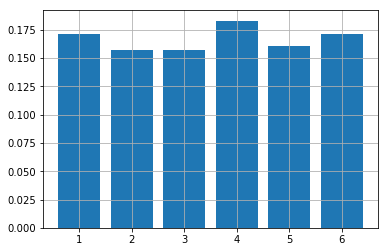

In [18]:
# 一様分布
plt.bar(dice_data, prob_data)
plt.grid(True)

次は、ベルヌーイ分布です。結果が2種類しかない試行をベルヌーイ試行といいます。ベルヌーイ分布とは、1回のベルヌーイ試行において各事象が生じる確率の分布を指します。以下は、コインを投げて表が出たらhead、裏が出たらtailとした場合に、8回コインを投げたら値がどう分布するかを示しています。

In [21]:
# ベルヌーイ分布
# 0:head(表)、1:tail(裏)と考える
# サンプル数を8とした
prob_be_data = np.array([])
coin_data = np.array([0, 0, 0, 0, 0, 1, 1, 1])

# uniqueで一意な値を抽出（ここの場合は、0と1）
for i in np.unique(coin_data):
    print(i, "が出る確率", len(coin_data[coin_data==i]) / len(coin_data))
    prob_be_data = np.append(prob_be_data, len(coin_data[coin_data==i]) / len(coin_data))

0 が出る確率 0.625
1 が出る確率 0.375


グラフ化すると以下のようになります。なお、xticksでラベルを設定しています。

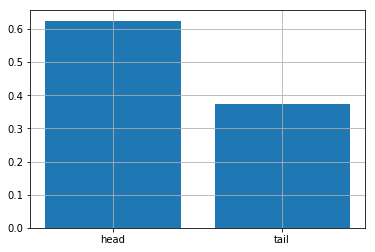

In [22]:
plt.bar([0, 1], prob_be_data, align="center")
plt.xticks([0, 1], ['head', 'tail'])
plt.grid(True)

次は、二項分布です。独立なベルヌーイ試行をn回繰り返します。pythonでは、random.binominalを使い、パラメーターは順に、試行回数(n)、確率(p)、サンプル数を示しています。random.binominalはn回の試行のうち、確率pで生じる事象が発生する回数を返します。

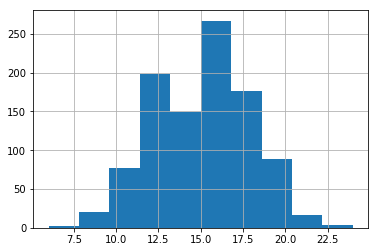

In [23]:
# 二項分布
random.seed(0)
x = random.binomial(30, 0.5, 1000)
plt.hist(x)
plt.grid(True)

以下はポアソン分布です。稀な事象が起きる確率の時、使われます。random.poissonを使います。パラメータλは7を設定しています。

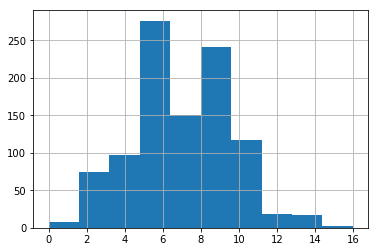

In [24]:
# ポアソン分布
x = random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

次は、正規分布と対数正規分布です。

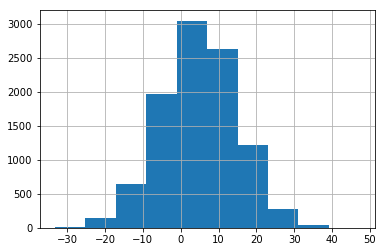

In [25]:
# 正規分布
# np.random.normal(平均、標準偏差、サンプル数)
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

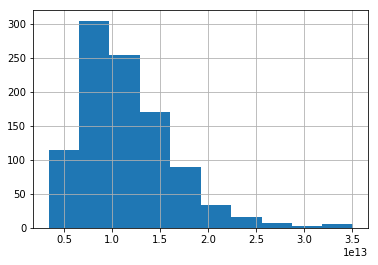

In [26]:
# 対数正規分布
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

最後にカーネル密度関数について見ていきましょう。これは、与えられたデータを使って、密度関数を推定するものです。先ほどの学生の欠席数データについて、分布の近似をします。以下は、カーネル密度関数を使って、分布を推定しています。ただし、データの性質上、0より小さいものはありえないので、実務で使うときは注意しましょう。

なお、グラフは3章で用いたデータから作成します。

In [27]:
# 注：ここはデータを取得していれば、実行しなくて大丈夫です。
import requests, zipfile
from io import StringIO
import io

zip_file_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip"

r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

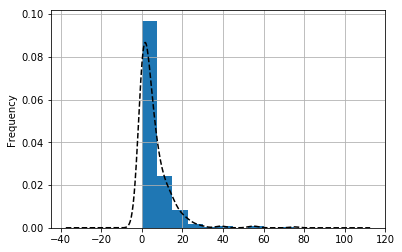

In [28]:
# データを読み込む
student_data_math = pd.read_csv("student-mat.csv", sep=";")

# カーネル密度関数
student_data_math.absences.plot(kind='kde', style='k--')

# 単純なヒストグラム、normed=Trueにすることで、確率で表示
student_data_math.absences.plot(kind='hist', normed = True)
plt.grid(True)

#### <練習問題 1>

平均0、分散1の正規分布からn=100の標本抽出を10000回繰り返して、標本平均$\overline{X}=\frac{1}{n}\sum^n_{i=1}X_i$の標本分布(ヒストグラム)を描いてください。

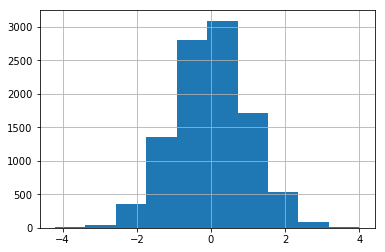

In [29]:
# 正規分布
# np.random.normal(平均、標準偏差、サンプル数)
x = np.random.normal(0, 1, 10000)
plt.hist(x)
plt.grid(True)

#### <練習問題 2>

上記と同じく、対数正規分布の場合を実装してください。

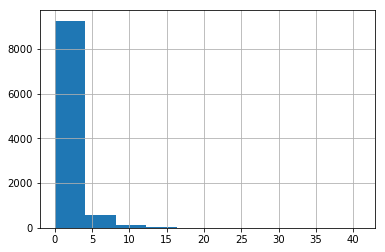

In [30]:
# 対数正規分布
x = np.random.lognormal(0, 1, 10000)
plt.hist(x)
plt.grid(True)

#### <練習問題 3>

3章で用いたデータを使い、学生のデータの数学一期目の成績G1のヒストグラムとカーネル密度推定を描いてください。

In [36]:
ls

student-mat.csv  student-merge.R  student-por.csv  student.txt


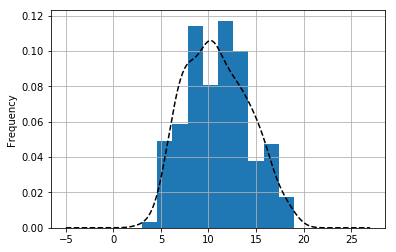

In [40]:
student_data_math = pd.read_csv("student-mat.csv", sep=";")

student_data_math.G1.plot(kind='kde', style='k--')
student_data_math.G1.plot(kind='hist', normed = True)
plt.grid(True)

***

### 4.1.3 （応用）多次元確率分布
キーワード：同時確率分布、周辺確率関数、条件付き確率関数、条件付き平均、分散共分散行列、多次元正規分布

これまでは、確率変数が1つのみの場合を扱ってきました。次は、確率変数が2つかそれ以上にある場合の確率分布を考えていきましょう。なお、ここは少し応用の範囲になり、難しい場合は、読み流しても後の章に大きな影響はないようにしています。練習問題はありません。

$X$が{$x_0, x_1, ...$}、$Y$が{$y_0, y_1, ...$}上で値をとる離散型の確率変数を考えます。$X=x_i$と$Y=y_j$である確率を以下のように書くとします。

\begin{eqnarray}
P(X=x_i, Y=y_j) = p_{X, Y}(x_i, y_j)
\end{eqnarray}

これを**同時確率関数**といい、また、

\begin{eqnarray}
p_{X}(x_i) = \sum^\infty_{j=0}p_{X, Y}(x_i, y_j)
\end{eqnarray}

を$X$の**周辺確率関数**といい、$Y$についても同様に定義されます。

1変数の時に定義した条件付き確率について、2変数のケースを考えてみましょう。$X=x_i$を与えた時の$Y=y_j$の**条件付き確率関数**を以下のように定義します。

\begin{eqnarray}
p_{Y|X}(y_j|x_i) = P(Y=y_j|X=x_i) =  \frac{p_{X, Y}(x_i, y_j)}{p_X(x_i)}
\end{eqnarray}

また、この条件付き確率関数に関して、期待値をとったものが条件付き期待値であり、$X=x_i$を与えた時の$Y$の**条件付き平均**は、

\begin{eqnarray}
E[Y|X=x_i] = \sum^\infty_{j=1}y_jp_{Y|X}(y_j|x_i) = \frac{\sum^\infty_{j=1}y_jp_{X, Y}(x_i, y_j)}{p_X(x_i)}
\end{eqnarray}

のように定義されます。

2変数における独立の定義は、すべての$x_i$と$y_j$に関して、以下が成り立つ時に、独立であるとします。

\begin{eqnarray}
p_{X, Y}(x_i, y_j) = p_{X}(x_i) p_{Y}(y_j) 
\end{eqnarray}

連続分布についても、同時確率密度関数、周辺確率密度関数、条件付き確率密度関数、独立など定義でき、さらに3つ以上の確率変数の分布についても定義できます。さらに、多変量正規分布やその中で使われる分散共分散行列などもありますが、これらの概念については、参考文献等を使い、勉強してみてください。

参考ですが、この多次元の同時確率密度関数をイメージするために、以下で2次元正規分布を表示させてみましょう。

In [41]:
# 必要なモジュールの読み込み
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [42]:
# データの設定
x, y = np.mgrid[10:100:2, 10:100:2]

pos = np.empty(x.shape + (2, ))

pos[:, :, 0] = x 
pos[:, :, 1] = y 

上のxとyのデータが10から2つずつ数を作成して、posでまとめています。（次に発生させる多次元の正規分布を可視化するために、xとyで細かくデータを刻んでいるだけで、区切りの数字等には特に意味はありません。）

次は、2次元の正規分布に従うデータを発生させています。multivariate_normalには、それぞれの平均と分散共分散行列を設定します。

In [43]:
# 多次元正規分布
# それぞれの変数の平均と分散共分散行列を設定
# 以下の例では、xとyの平均がそれぞれ50と50、[[100, 0], [0, 100]]がxとyの共分散行列になります
rv = multivariate_normal([50, 50], [[100, 0], [0, 100]])

# 確率密度関数
z = rv.pdf(pos)

上記をグラフ化すると以下のようになります。なお、3次元グラフのためAxes3Dのplot_wireframeを使っています。

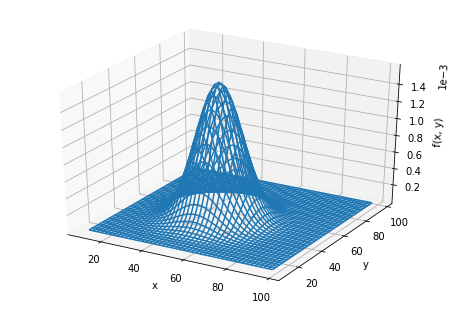

In [44]:
# グラフ化
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(x, y, z)

# x,y,zラベルの設定など
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# z軸の表示目盛り単位を変更、sciが指数表示、axisで軸を指定、scilimits=(n,m)はnからmの外にあるものは指数表記
# scilimits=(0,0)はすべて指数表記にするという意味
plt.ticklabel_format(style='sci', axis='z', scilimits=(0, 0)) 

***

### 4.1.4 標本分布
キーワード：標本、母集団、抽出、推測統計学、標本のサイズ、大数の法則、中心極限定理、t分布、カイ二乗分布、F分布

これまでは、実際に得られたデータについての平均や標準偏差等を求めてきました。この手に入れたデータのことを**標本**といいます。しかし、本来はその背後にあるもっと大きなデータ・全体の性質を知ることが重要です。この標本をベースに統計的な分析を実施して、推測しようとする対象全体を**母集団**といい、これが**推測統計学**です。また、標本は母集団から取り出されたもので、これを**抽出**といいます。実際に、観測されたデータ$x_1, , , x_n$は、n個の確率変数$X_1, , , X_n$の実現値であり、このnを標本の**サイズ（大きさ）**といいます。

![dd](http://www.toukei.metro.tokyo.jp/manabou/img/tyuu/sirou/tokutyou/m-1.jpg)

参照URL：http://www.toukei.metro.tokyo.jp/manabou/img/tyuu/sirou/tokutyou/m-1.jpg

次は、確率論で重要な**大数の法則**について学びます。ここで再び先ほどのサイコロを投げて出目を調べる例を考えましょう。

サイコロをどんどん振っていき、それまでの平均値の軌跡をたどります。具体的には、1回目投げた時の目が1の時は平均1、次に投げた時に3が出た場合は、(1＋3)/2で平均は2という具合に、続けて平均値を計算していきます。大数の法則とは、この試行を繰り返していく（試行回数Nを大きくする）と、その平均は、期待値(3.5)に近づいていくという法則です。

以下では、サイコロを投げる回数Nを1000とし、それを4回実施します（4パス）。以下の結果グラフは、どのパスもNが大きくなればなるほど、3.5に近づいてるのがわかります。

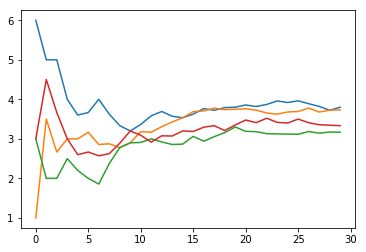

In [45]:
# 大数の法則

# 計算回数
calc_times =10*3
# サイコロ
sample_array = np.array([1, 2, 3, 4, 5, 6])
number_cnt = np.arange(1, calc_times + 1)

# 4つのパスを生成
for i in range(1, 5):
    random.seed(i)
    cum_variables = random.choice(sample_array, calc_times).cumsum()
    plt.plot(cum_variables / number_cnt)

次は、中心極限定理です。こちらは、Nが増えれば増えるほど、標本平均が正規分布の形になっていく法則です。

In [46]:
# 中心極限定理
def function_central_theory(N):
    
    sample_array = np.array([1, 2, 3, 4, 5, 6])
    numaber_cnt = np.arange(1, N + 1) * 1.0
 
    mean_array = np.array([])
 
    for i in range(1, 10**3):   
        random.seed(i)
        cum_variables = random.choice(sample_array, N).cumsum()*1.0
        mean_array = np.append(mean_array, cum_variables[N-1] / N)
 
    plt.hist(mean_array)

それではこの関数を使って、Nをどんどん増やし、そのヒストグラフを見てみましょう。

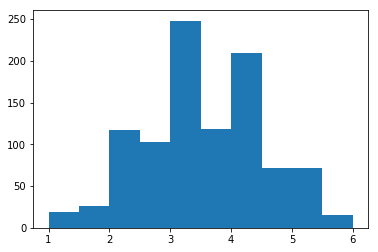

In [47]:
# N=3
function_central_theory(3)

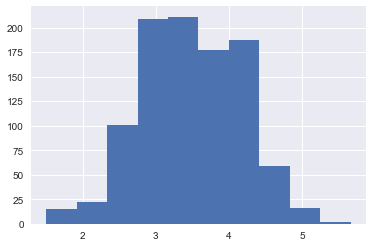

In [25]:
# N=6
function_central_theory(6)

Nをどんどん増やしていくと、正規分布の形になっているのがわかります。

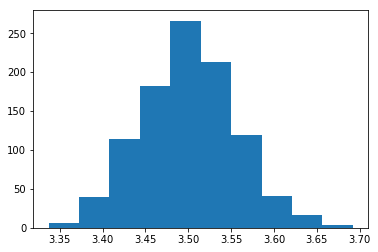

In [48]:
# N= 10^3
function_central_theory(10**3)

次に、代表的な標本分布について学びましょう。

1つ目は**カイ2乗分布**です。m個の確率変数$Z_1, ...Z_m$が互いに独立に分布し、各$Z_i$が標準正規分布（平均0，分散1の正規分布）
に従うとします。この時、以下の確率変数の二乗和

\begin{eqnarray}
W = \sum^m_{i=1}Z^{2}_{i}
\end{eqnarray}

は、自由度mのカイ2乗分布に従うと言います。以下が、その分布に従う乱数のヒストグラムです。なお、zipは1章で少し紹介した関数で、複数のシーケンスオブジェクトを取り出すのに使用します。以下ですと、2とb、10とg、60とrがそれぞれdfとcに入り、取り出されます。

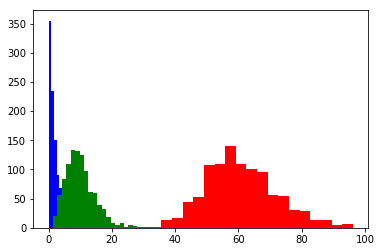

In [49]:
# カイ2乗分布
# 自由度2, 10, 60に従うカイ二乗分布が生成する乱数のヒストグラム
for df, c in zip([2, 10, 60], "bgr"):
    x = random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)

次は、ステューデントの**t-分布**です。$Z$と$W$を独立な確率変数として、それぞれ標準正規分布、自由度mのカイ2乗分布に従うとした時、

\begin{eqnarray}
T = \frac{Z}{\sqrt{\frac{W}{m}}}
\end{eqnarray}

とおいた時、Tは自由度mのステューデントのt-分布に従うといいます。以下はt分布のサンプル図です。

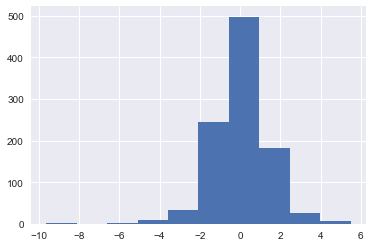

In [28]:
# t-分布
x = random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

最後に、**F分布**についても紹介します。$W_1$と$W_2$を独立な確率変数、それぞれ自由度$m_1, m_2$のカイ2乗分布に従うとして、

\begin{eqnarray}
F = \frac{\frac{W_1}{m_2}}{\frac{W_2}{m_2}}
\end{eqnarray}

とおいた時、$F$は自由度$(m_1, m_2)$のスネディッカーのF-分布に従うといいます。以下は、F分布のサンプル図です。

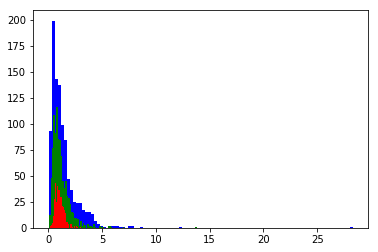

In [50]:
# F 分布
for df, c in zip([ (6, 7), (10, 10), (20, 25)], "bgr"):
    x = random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)

以上で代表的な分布についての紹介は終わります。他にも、いろいろな分布がありますので、必要が生じた場合にその都度調べてみましょう。

#### <練習問題 1>

自由度5、25、50のカイ二乗分布からの乱数をそれぞれ1000個発生させて、ヒストグラムを書いてください。

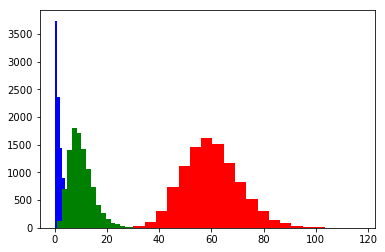

In [51]:
for df, c in zip([2, 10, 60], "bgr"):
    x = random.chisquare(df, 10000)
    plt.hist(x, 20, color=c)

#### <練習問題 2>

自由度100のt分布からの乱数を1000個発生させて、ヒストグラムを書いてください。

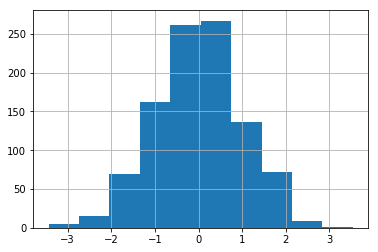

In [52]:
# t-分布
x = random.standard_t(100, 1000)
plt.hist(x)
plt.grid(True)

#### <練習問題 3>

自由度(10, 30)、(20, 25)のF分布からの乱数をそれぞれ1000個発生させて、ヒストグラムを書いてください。

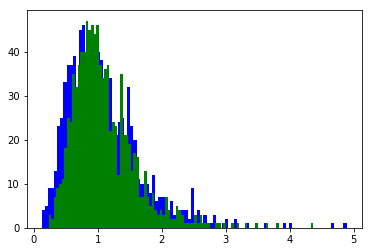

In [53]:
# F 分布
for df, c in zip([ (10,30), (20,25)], "bgr"):
    x = random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)

***

### 4.1.5 統計的推定
キーワード：推定量、点推定、不偏性、不偏推定量、一致性、区間推定、信頼区間、信頼係数、最尤法、尤度、尤度関数、ベイズ法

ここでは「推定」について学んでいきます。母集団から標本を抽出し、それに基づいて母集団の確率分布、平均、分散の推測をするのですが、その時に標本の平均や分散を使って推定します。ここで、大きさnの無作為標本{$X_1, ..., X_n$}をもとに、母平均$\mu$を求める(推定する)方法を考えると、標本平均は、

\begin{eqnarray}
\overline{X}=\frac{1}{n}\sum^n_{i=1}X_i
\end{eqnarray}

となります。これを一般化すると、以下のように確率変数の関数として記述でき、これを**推定量**といいます。母数を推定するための式で、母集団のパラメータの値（$\theta$）を観測される標本に基づいて言い当てることを**点推定**といいます。

\begin{eqnarray}
\overline{X}=T(X_1, ..., X_n)
\end{eqnarray}

ただし、関数としてなんでも良いというわけではなく、パラメータをより正確に推定できることが望ましいです。そのための判断基準として、**不偏性**と**一致性**という性質があります。

推定量の期待値が母数$\theta$と一致するとき、推定量は**不偏**であるといい、この不偏性をもつ推定量を**不偏推定量**といいます。

\begin{eqnarray}
E[T(X_1, ..., X_n)]=\theta
\end{eqnarray}

一致性とは、$\theta$の推定量$E[T(X_1, ..., X_n)]$が観測個数nが大きくなるにつれて、$\theta$に近づいていくという性質であり、任意の$\epsilon>0$に関して、以下のように表現できます。このとき、$T(X_1, ..., X_n)$を一致推定量といいます。

\begin{eqnarray}
\displaystyle \lim_{n \to \infty} P[|T(X_1, ..., X_n)- \theta |\ge \epsilon]=0
\end{eqnarray}

次は、区間推定です。点推定では、母数を1点で求めましたが、区間推定は母数が入っていそうな区間を推定します。まず、$X_1, ..., X_n$が正規分布$N(\mu , 1)$から無作為抽出されていて、これらから母数$\mu$を推定する場合を考えてみましょう。この場合、標本平均$\overline{X}$は正規分布$N(\mu , \frac{1}{n})$に従うため、正規分布の両側$\alpha$点を$z_{\alpha /2}$として、

\begin{eqnarray}
P(-z_{\alpha /2} \le \sqrt{\mathstrut n} (\overline{X} - \mu ) \le z_{\alpha /2} )=1-\alpha
\end{eqnarray}

が成り立ちます。この式を書き換えると、

\begin{eqnarray}
P(\overline{X} - \frac{z_{\alpha /2}}{\sqrt{n}} \le \mu \le \overline{X} + \frac{z_{\alpha /2}}{\sqrt{n}})=1-\alpha
\end{eqnarray}

と書くことができ、区間$[\overline{X} - \frac{z_{\alpha /2}}{\sqrt{n}} , \overline{X} + \frac{z_{\alpha /2}}{\sqrt{n}}]$ を$\mu$の推定のための区間として用いることができます。このとき、区間$[\overline{X} - \frac{z_{\alpha /2}}{\sqrt{n}} , \overline{X} + \frac{z_{\alpha /2}}{\sqrt{n}}]$を**信頼係数**$1-\alpha$の**信頼区間**といいます。信頼区間の一般的な定義は以下のようになります。

$X_1, ..., X_n$を母集団分布$f(x;\theta)$からの無作為標本として、$\theta$は1次元の母数とします。${\bf X}=(X_1, ..., X_n)$とおくと、2つの統計量$L({\bf X}), U({\bf X})$がすべての$\theta$について以下を満たす時、区間$[L({\bf X}), U({\bf X})]$を**信頼係数**$1-\alpha$の**信頼区間**といいます。

\begin{eqnarray}
P(L({\bf X})\le \theta \le U({\bf X})) \ge 1-\alpha
\end{eqnarray}

最後に、推定量を求める方法、最尤法、ベイズ法について簡単に解説します。（他にモーメント法などもありますので、調べてみてください。）

・最尤法

同時確率関数を学んだ時に、母数を与えられて、観測値が生じる確率を求めましたが、逆に、観測値を与えられた時に、確率関数を母数の関数とみなしたものが**尤度関数**になります。この最尤法とは、尤度関数を最大化する母数を母数の推定値とする方法です。

今、確率関数$f(x;\theta)$を与えられているとして、その母集団からの無作為標本$X_1, ..., X_n$をとり、${\bf X}=(X_1, ..., X_n)$とします。この${\bf X}$の実現値${\bf x}=(x_1, ..., x_n)$における同時確率関数を$\theta$の関数とみなして、以下のように尤度関数を定義します。

\begin{eqnarray}
L(\theta;{\bf x})=f(x_1;\theta) \times...\times f(x_n;\theta)
\end{eqnarray}

尤度関数は、積の形をしており、対数変換によって和に直した方が計算しやすいため、以下のように**対数尤度関数**に直します。

\begin{eqnarray}
\log L(\theta;{\bf x})=\sum^n_{i=1} \log f(x_i;\theta)
\end{eqnarray}

上記の最大値を求めるために、微分して0になる解$\theta$を求めます。以下の方程式を**尤度方程式**、この解$\theta$を**最尤推定量**といいます。これが最尤推定法になります。

\begin{eqnarray}
\frac{d}{d\theta}{\log L(\theta;{\bf x})}= 0
\end{eqnarray}

・ベイズ法

今までは、母数$\theta$に対して何も情報がなく、頻度論的なアプローチで推定をしていましたが、この$\theta$について、事前分布を仮定して、ベイズの公式を使い、事後分布に更新していくことをベイズ法といいます。

ここで、標本から得られる尤度関数を$p(x|\theta)$として、母数$\theta$が事前確率$\pi(\theta)$に従うと仮定すると、ベイズの公式により、事後分布を以下のように求めることができます。

\begin{eqnarray}
\pi(\theta|x) = \frac{p(x|\theta)\pi(\theta)}{\int p(x|\theta)\pi(\theta) d\theta}
\end{eqnarray}

#### <練習問題 1>
平均$\mu$で分散$\sigma^2$の正規母集団から大きさnの標本から作った標本平均は、母平均であることが望ましく、この不偏性を示してください。（手計算で大丈夫です。）

#### <練習問題 2>
あるコインを5回投げたとして、裏、表、裏、表、表と出ました。このコインの表が出る確率を$\theta$として、これを推定してください。（手計算で大丈夫です。）

#### <練習問題 3>
母集団が以下の指数分布に従っている時に、そこから大きさnの標本${X_1, X_2, ...X_n}$を得たとして、母数${\lambda}$を最尤推定してください。（手計算で大丈夫です。）
\begin{eqnarray}
f(x|\lambda) = \lambda \mathrm{e}^{-\lambda x}
\end{eqnarray}

***

### 4.1.6 統計的検定
キーワード：帰無仮説、対立仮説、有意、棄却、有意水準、第1種の過誤、第2種の過誤、検出力

さて、長く数式の説明が続いたので、ここで再び「学生のデータ」に戻りましょう。練習問題でもやりましたが、まずは、数学とポルトガル語の成績の平均を計算してみると、以下のようになります。

In [54]:
student_data_por = pd.read_csv("student-por.csv", sep=";")
student_data_merge = pd.merge(student_data_math
                              , student_data_por
                              , on=["school", "sex", "age", "address", "famsize", "Pstatus", "Medu"
                                   , "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]
                              , suffixes=('_math', '_por'))

print("G1数学の成績平均：", student_data_merge.G1_math.mean())
print("G1ポルトガル語の成績平均：", student_data_merge.G1_por.mean())

G1数学の成績平均： 10.861256544502618
G1ポルトガル語の成績平均： 12.112565445026178


数字を見ていると、若干ではありますが、数学の方が悪いように見えます。しかし、果たしてこれは本当に差があるのかいえないのか、それが問題となります。これを考えていくのが検定というアプローチです。仮説として、母集団において差がないとしましょう。つまり、以下の式が成り立つとします。

\begin{eqnarray}
\mu_{math} = \mu_{por}
\end{eqnarray}

ここで、$\mu_{math}$と$\mu_{por}$はそれぞれの母平均とします。この等しいという仮説を**帰無仮説**といい、$H_{0}$とします。一方、帰無仮説の否定の、2つの間に差があるという仮説

\begin{eqnarray}
\mu_{math} \neq \mu_{por}
\end{eqnarray}

を**対立仮説**といい、$H_{1}$と表します。次に、先ほどの$H_{0}$を正しいとした場合に、統計的なアプローチを取り、それが起こることはありえない（例えば、確率が5%未満になる）ということが言えたとします。この時、この$H_{0}$は**棄却**されるといい、対立仮説が採択され、よって差があることがいえることになります。また、先ほど5%未満としましたが、これを**有意水準**5%で、統計的な差がある(**有意**である)といいます。有意水準は**α**で表され、α=5%やα=1%がよく使われます。また、**p-value**(**p値**)とは、帰無仮説が正しいとした場合に、データから計算された統計量以上に極端な統計量が観測される確率です。p値が低いほど、$H_{0}$が正しいとした場合に、ありえないことが起きたということになります。


それでは、これらの概念を使って、計算してみましょう。 stats.ttest_relを使います。

In [56]:
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print( "p値 = ", p)

p値 =  1.65365552171e-16


有意水準を1%で設定すると、差があると結論づけることができました。

ここでは、有意水準1%だと帰無仮説が棄却されましたが、もしかすると帰無仮説が正しかったということもありえます。このように、帰無仮説が正しいにもかかわらず、棄却してしまうことを**第1種の過誤**といいます。別名、あわてものの誤りとも言われます。一方、この帰無仮説が誤っているにもかかわらず受容してしまうことを、**第2種の過誤**といい、その確率を**β**で表します。このβの補数1-βは**検出力**と呼ばれ、帰無仮説が誤っているときに正しく棄却できる確率を表します。この第2種の過誤は誤っているのに見過ごしているので、ぼんやりものの誤りともいわれます。一般的に1-βは0.8程度ほしいといわれています。しかし、αとβは片方を小さくすると、もう片方は大きくなる関係にあります。また、βは重要な量ですが、値を計算するにはサンプルサイズや効果量が必要になるため、ここでは概念の紹介に留めておきます。

様々な分野で使用されている検定ですが、注意点があります。実は検定はビッグデータの解析（特に決まった厳密な定義はありませんが、サンプルサイズが数百万、数千万以上ある場合を想定しています）には向いていないのです。まず第一に、異なる母集団の母数が互いに厳密に等しいことは、実世界ではほぼあり得ません。サンプルサイズを大きくすると、それにともなって検出力1-βが大きくなり、実務的には等しいと考えていいような微妙な差であってもp値が小さくなり、帰無仮説が棄却されてしまいます。つまり、ビッグデータに対して検定を行うと大抵の場合、高度に有意な(p値がかなり小さい)結果になってしまうのです。

また、検定で高度に有意な結果になったとしても、2つの母数は大きく異なるという事は結論付けられません。2つの値がどの程度異なるかに関しては検定からはわからないのです。どの程度の差があるかを知りたい場合には前節で用いた信頼区間を用いるのが効果的です。

以上で、検定までの単元は終了です。この単元は幅が広く、この講座では扱いきれない部分がありますが、もし今までに統計や確率について学ぶ機会がなかった場合は、はじめに紹介した参考文献等を見ながら是非一通り勉強してみてください。また、今まで扱ったモジュールの関数には色々なオプションがありますので、興味のある方は調べてみてください。

#### <練習問題 1>

上記と同じデータで、数学とポルトガル語の成績のG2のそれぞれの平均について、差があると言えるでしょうか。また、G3はどうでしょうか。

In [58]:
print("G2数学の成績平均：", student_data_merge.G2_math.mean())
print("G2ポルトガル語の成績平均：", student_data_merge.G2_por.mean())

t, p = stats.ttest_rel(student_data_merge.G2_math, student_data_merge.G2_por)
print( "p値 = ", p)

print("G3数学の成績平均：", student_data_merge.G3_math.mean())
print("G3ポルトガル語の成績平均：", student_data_merge.G3_por.mean())

t, p = stats.ttest_rel(student_data_merge.G3_math, student_data_merge.G3_por)
print( "p値 = ", p)

G2数学の成績平均： 10.712041884816754
G2ポルトガル語の成績平均： 12.238219895287958
p値 =  4.06228248013e-19
G3数学の成績平均： 10.387434554973822
G3ポルトガル語の成績平均： 12.515706806282722
p値 =  5.56149211369e-21


***

## 4.2 総合問題

### 4.2.1 推定と検定の問題
4.1.6 統計的検定で使用したデータ（student_data_merge）を使って、以下の問いに答えてください。

(1)それぞれの欠席数については、差があるといえるでしょうか。

(2)それぞれの勉強時間についてはどうでしょうか。

In [65]:
t, p = stats.ttest_rel(student_data_merge.absences_math, student_data_merge.absences_por)
print( "p値 = ", p)

p値 =  2.34416568884e-06


In [67]:
t, p = stats.ttest_rel(student_data_merge.studytime_math, student_data_merge.studytime_por)
print( "p値 = ", p)

p値 =  0.564384275698
